# 911 calls Analysis:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

# Exploratory analysis:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


5 zip codes with more calls

In [5]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

5 Cities with more calls

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Analysing the unique values in title

In [7]:
df['title'].nunique()

110

## Creating new variables:

There're in reasons and departments registered in the column title, let's separate it in 2 columns

In [8]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [9]:
#The most common reason is Emergency Medical Services:
df['Reason'].value_counts().head(1)

EMS    48877
Name: Reason, dtype: int64

<AxesSubplot:title={'center':'Call reason'}, xlabel='Reason', ylabel='count'>

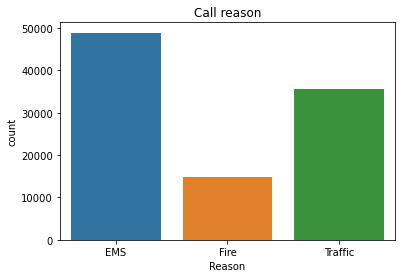

In [10]:
plt.title('Call reason')
sns.countplot(x='Reason', data=df)

## Formatting time stamp:

In [11]:
type(df['timeStamp'].iloc[0])

str

The call timeStamp is of type object, let's convert it to data

In [12]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [13]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Let's create 3 new columns: hour, month and days of week.

In [14]:
df['Hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['Month'] = df['timeStamp'].apply(lambda x: x.month)
df['Day of Week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

Based into a dmap let's change the numerical day to text and visualize the ocurrencies in every day of week

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [16]:
df['Day of Week'] = df['Day of Week'].map(dmap)

<AxesSubplot:xlabel='Day of Week', ylabel='count'>

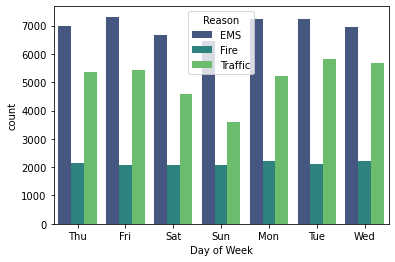

In [17]:
sns.countplot(x='Day of Week', data=df, hue='Reason', palette='viridis')

Now, let's see the ocurrencies based in the month

<AxesSubplot:xlabel='Month', ylabel='count'>

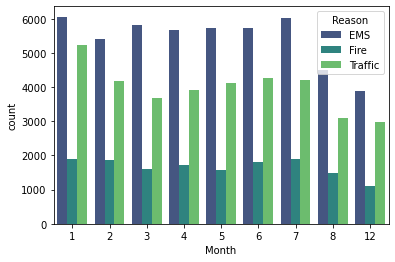

In [18]:
sns.countplot(x='Month', data=df, hue='Reason', palette='viridis')

Some months (9, 10 and 11) are missing, so we can't visualize it, but we still able to visualize the trending with line graphs and regression plots

In [19]:
byMonth = df.groupby('Month').count()
byMonth.head(9)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day of Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


<AxesSubplot:xlabel='Month'>

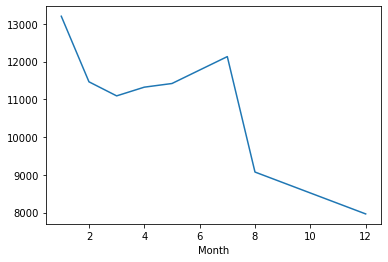

In [20]:
byMonth['twp'].plot()

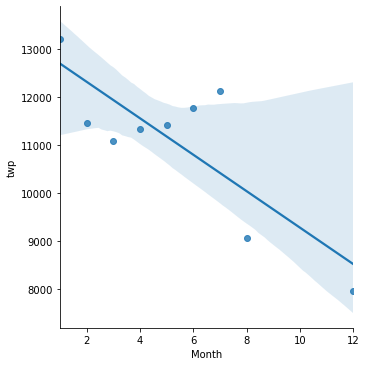

In [21]:
sns.lmplot(x='Month', y='twp', data=byMonth.reset_index())

In [22]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())

In [23]:
newDf = df.groupby('Date')
newDf.count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day of Week
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


<AxesSubplot:xlabel='Date'>

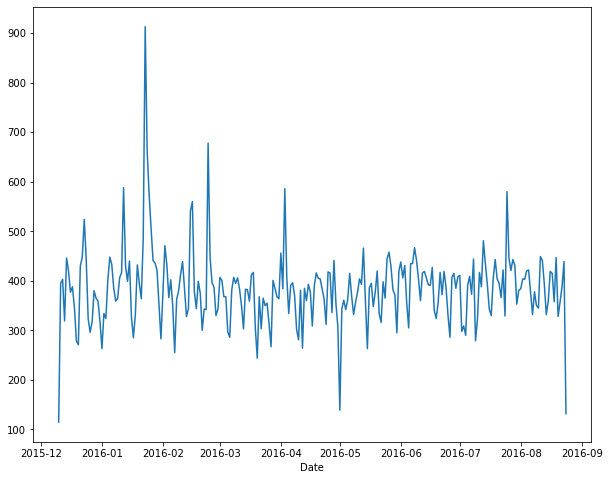

In [24]:
plt.figure(figsize=(10, 8))
newDf.count()['twp'].plot()

Now, let's visualize this graph for every reason

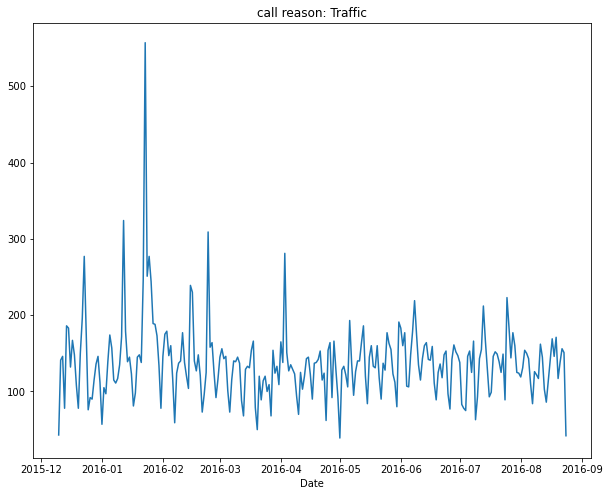

In [25]:
plt.figure(figsize=(10, 8))
plt.title('call reason: Traffic')
TrafficDf = df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()

<AxesSubplot:title={'center':'call reason: Fire'}, xlabel='Date'>

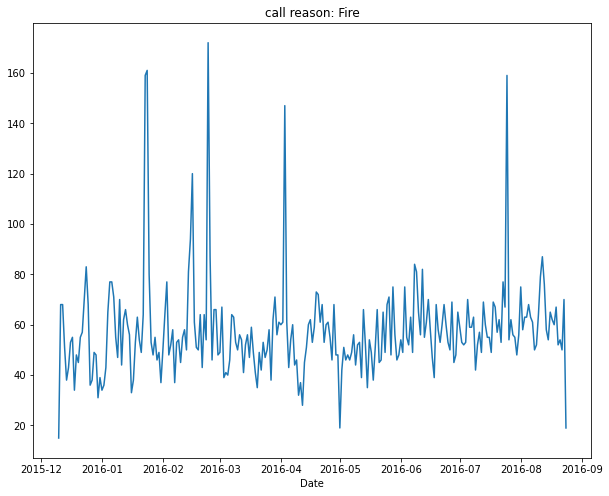

In [26]:
plt.figure(figsize=(10, 8))
plt.title('call reason: Fire')
df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()

<AxesSubplot:title={'center':'call reason: EMS'}, xlabel='Date'>

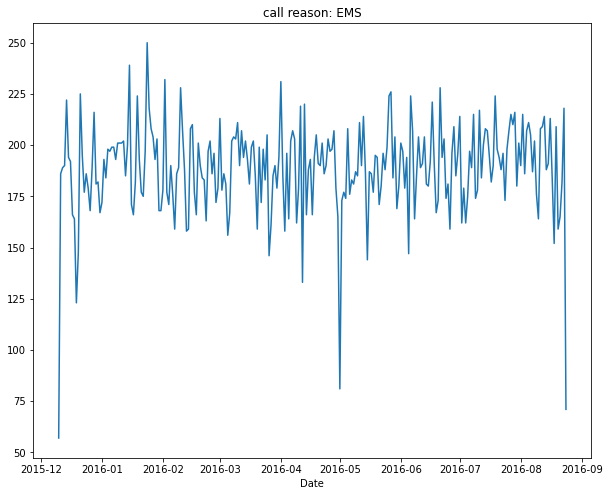

In [27]:
plt.figure(figsize=(10, 8))
plt.title('call reason: EMS')
df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()

## The hours with more calls every day of week:

In [28]:
dayHour = df.groupby(by=['Day of Week', 'Hour']).count()
dayHour

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Fri         0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wed         19    686  686   686  590    686        686  686   682  686   
            20    668  668   668  597    668        668  668   662  668   
            21    575  575   575  508    575        575  574   572  575   
            22    490  490   490  432    490        490  490   485  490   
            23    335  335   335  294    335        335  334   335  335   

                  Reason  Month  Date  
Day of Week Hour                       
Fri         0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201  
...                  ...    ...   ...  
Wed         19       686    686   686  
            20       668    668   668  
            21       575    575   575  
            22       490    490   490  
            23       335    335   335  

[168 rows x 12 columns]

In [29]:
dayHour = dayHour['twp'].unstack()
dayHour

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354
Tue,269,240,186,170,209,239,414,655,889,878,...,942,938,1026,1018,905,731,647,570,462,274
Wed,249,216,189,207,156,254,409,701,875,808,...,903,867,989,1036,894,686,668,574,490,334


### 911 calls heatmap:

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

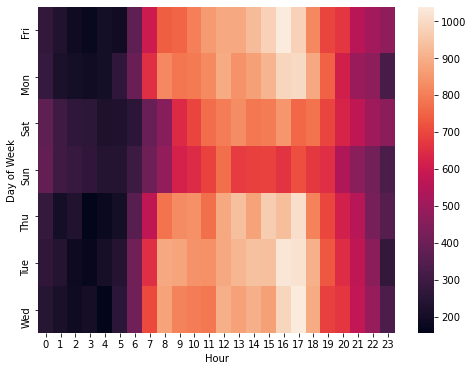

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(dayHour)

### 911 calls clustermap:

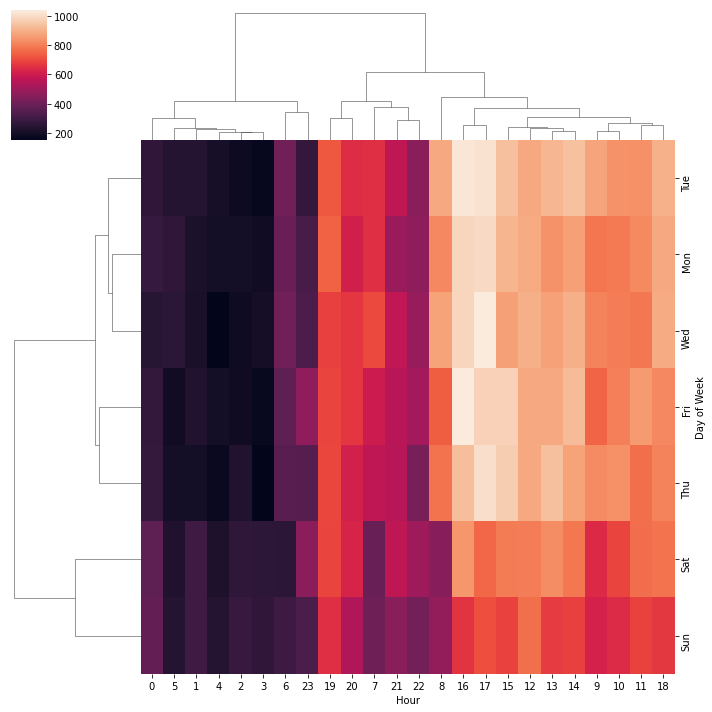

In [31]:
sns.clustermap(dayHour)

## The days of week with more calls every month:

Unfortunately there's no data of months 9, 10 and 11, so we're going to visualize it with the other months

In [32]:
dayMonth = df.groupby(by=['Day of Week', 'Month'])['twp'].count()
dayMonth = dayMonth.unstack()

<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

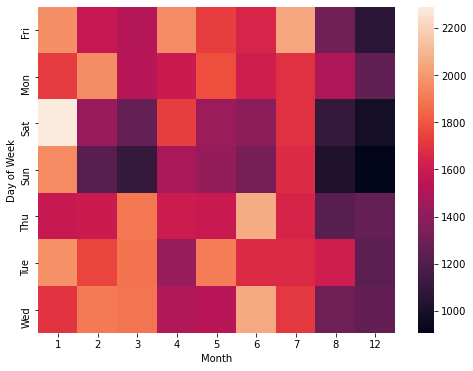

In [33]:
plt.figure(figsize=(8, 6))
sns.heatmap(dayMonth)

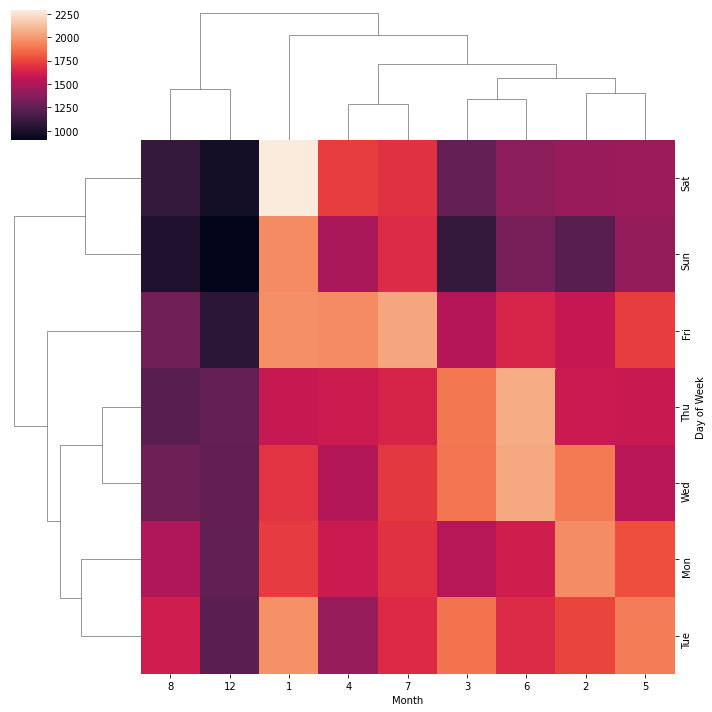

In [34]:
sns.clustermap(dayMonth)